Map Coloring

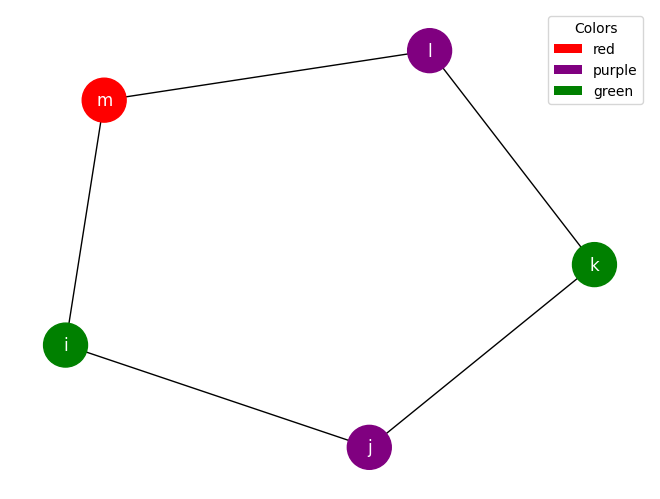

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
nodes = ['i', 'j', 'k', 'l', 'm']
connections = [('i', 'j'), ('i', 'm'), ('j', 'k'), ('k', 'l'), ('l', 'm')]
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(connections)
node_colors = ['red', 'green', 'blue', 'purple']
def greedy_coloring(graph, available_colors):
    color_assignment = {}
    for node in graph.nodes():
        available_colors_set = set(available_colors)
        for neighbor in graph.neighbors(node):
            if neighbor in color_assignment:
                available_colors_set.discard(color_assignment[neighbor])
        color_assignment[node] = available_colors_set.pop() if available_colors_set else "No Color"
    return color_assignment
color_assignment = greedy_coloring(G, node_colors)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=[color_assignment[node] for node in G.nodes()],
        with_labels=True, node_size=1000, font_color='white')
legend_elements = [Patch(facecolor=color, label=f'{color}') for color in set(color_assignment.values()) if color != "No Color"]
plt.legend(handles=legend_elements, title="Colors")
plt.show()
